In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler




C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load dataset
df = pd.read_csv('fruit.csv')
df.head()

,label,ph,temperature,humidity,altitude,rainfall,N,P,K
0,Loquat,6.81,29.31,53.57,1220,991.61,67,37,73
1,Loquat,7.14,34.36,69.20,274,1447.58,51,39,63
2,Loquat,6.99,29.37,63.68,158,1043.45,70,38,69
3,Loquat,6.49,34.32,52.78,559,807.70,53,27,87
4,Loquat,6.71,20.45,56.13,215,965.36,97,22,65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        4800 non-null   object 
 1   ph           4800 non-null   float64
 2   temperature  4800 non-null   float64
 3   humidity     4800 non-null   float64
 4   altitude     4800 non-null   int64  
 5   rainfall     4800 non-null   float64
 6   N            4800 non-null   int64  
 7   P            4800 non-null   int64  
 8   K            4800 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 337.6+ KB


In [4]:
# Check for missing values
df.isnull().sum()

label          0
ph             0
temperature    0
humidity       0
altitude       0
rainfall       0
N              0
P              0
K              0
dtype: int64

In [5]:
df.columns

Index(['label', 'ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N',
       'P', 'K'],
      dtype='object')

In [6]:
df.shape

(4800, 9)

In [7]:
df['label'].unique()

array(['Loquat', 'Orange', 'Pomegranates', 'Pineapple', 'Lychee',
       'Grapes', 'kiwi', 'Peaches', 'Lemons', 'Limes', 'Plum', 'Apricots',
       'Dragon Fruit', 'Starfruit', 'Avocado', 'Watermelons', 'Java Plum',
       'Apple', 'Custard Apple', 'Cranberries', 'Guavas', 'Jackfruits',
       'Chayote Fruit', 'Mango'], dtype=object)

In [8]:
df['label'].value_counts()

label
Loquat           200
Orange           200
Chayote Fruit    200
Jackfruits       200
Guavas           200
Cranberries      200
Custard Apple    200
Apple            200
Java Plum        200
Watermelons      200
Avocado          200
Starfruit        200
Dragon Fruit     200
Apricots         200
Plum             200
Limes            200
Lemons           200
Peaches          200
kiwi             200
Grapes           200
Lychee           200
Pineapple        200
Pomegranates     200
Mango            200
Name: count, dtype: int64

In [9]:
df.describe()

,ph,temperature,humidity,altitude,rainfall,N,P,K
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,6.330692,25.107631,63.448335,923.858125,1216.713821,133.552708,48.596042,184.171875
std,0.625406,5.471977,11.005516,671.914790,288.206894,33.817908,24.859077,50.994787
min,4.000000,10.040000,30.010000,61.000000,600.770000,50.000000,15.000000,50.000000
25%,5.950000,21.567500,56.187500,458.750000,1024.392500,110.000000,30.000000,151.000000
50%,6.360000,25.355000,64.750000,770.000000,1198.270000,130.000000,39.000000,183.000000
75%,6.790000,28.840000,72.092500,1181.250000,1401.557500,149.000000,64.000000,222.000000
max,7.500000,37.960000,84.920000,3983.000000,1999.070000,250.000000,140.000000,300.000000


In [10]:
# Map labels to numeric values for classification
labels = df['label'].unique()
labels_map = {label: idx+1 for idx, label in enumerate(labels)}
df['label'] = df['label'].map(labels_map)



In [11]:
labels =['Loquat', 'Orange', 'Pomegranates', 'Pineapple', 'Lychee','Grapes', 'kiwi', 'Peaches', 'Lemons', 'Limes', 'Plum','Apricots','Dragon Fruit', 'Starfruit', 'Avocado', 'Watermelons', 'Java Plum','Apple', 'Custard Apple', 'Cranberries', 'Guavas', 'Jackfruits','Chayote Fruit', 'Mango']


In [ ]:
# Visualize data distribution and characteristics
def visualize(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='pink')

    plt.subplot(1, 3, 2)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='pink')

    plt.show()

for col in df.columns[:-1]:
    print(f'Statistical plots for: {col}')
    visualize(df, col)
    print("-" * 60)



In [ ]:
# Visualize data distribution and characteristics
def visualize(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='pink')

    plt.subplot(1, 3, 2)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='pink')

    plt.show()

for col in df.columns[:-1]:
    print(f'Statistical plots for: {col}')
    visualize(df, col)
    print("-" * 60)



In [ ]:
sns.pairplot(df,hue = 'label')

<Axes: xlabel='label', ylabel='count'>

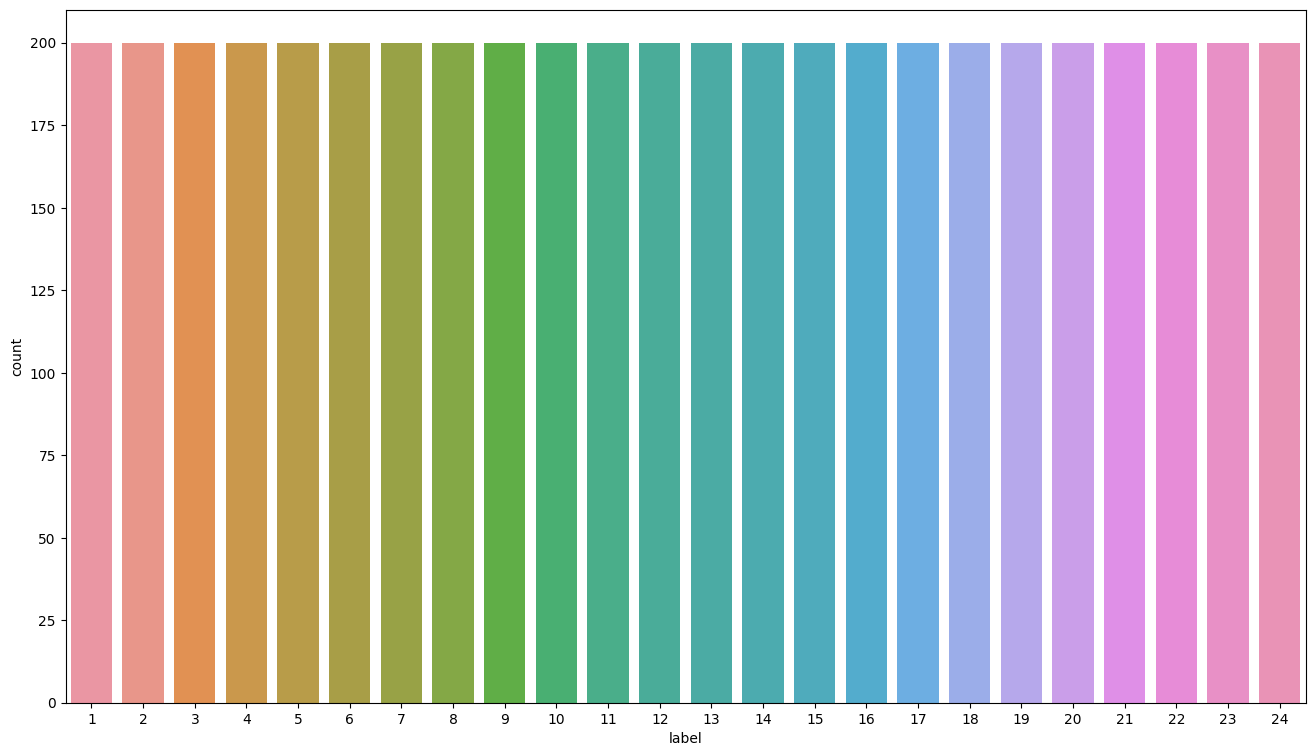

In [12]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [ ]:
df.shape

In [13]:
def handle_outliers_per_label(df, column):
    unique_labels = df['label'].unique()
    for label in unique_labels:
        label_data = df[df['label'] == label][column]
        q1 = label_data.quantile(0.25)
        q3 = label_data.quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df.loc[(df['label'] == label) & ((df[column] > upper_limit) | (df[column] < lower_limit)), column] = np.NaN

columns_to_handle_outliers = ['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K']
for col in columns_to_handle_outliers:
    handle_outliers_per_label(df, col)

# Dropping rows with NaN values after handling outliers per label
df.dropna(inplace=True)


In [14]:
df.shape

(4800, 9)

<Axes: xlabel='label', ylabel='count'>

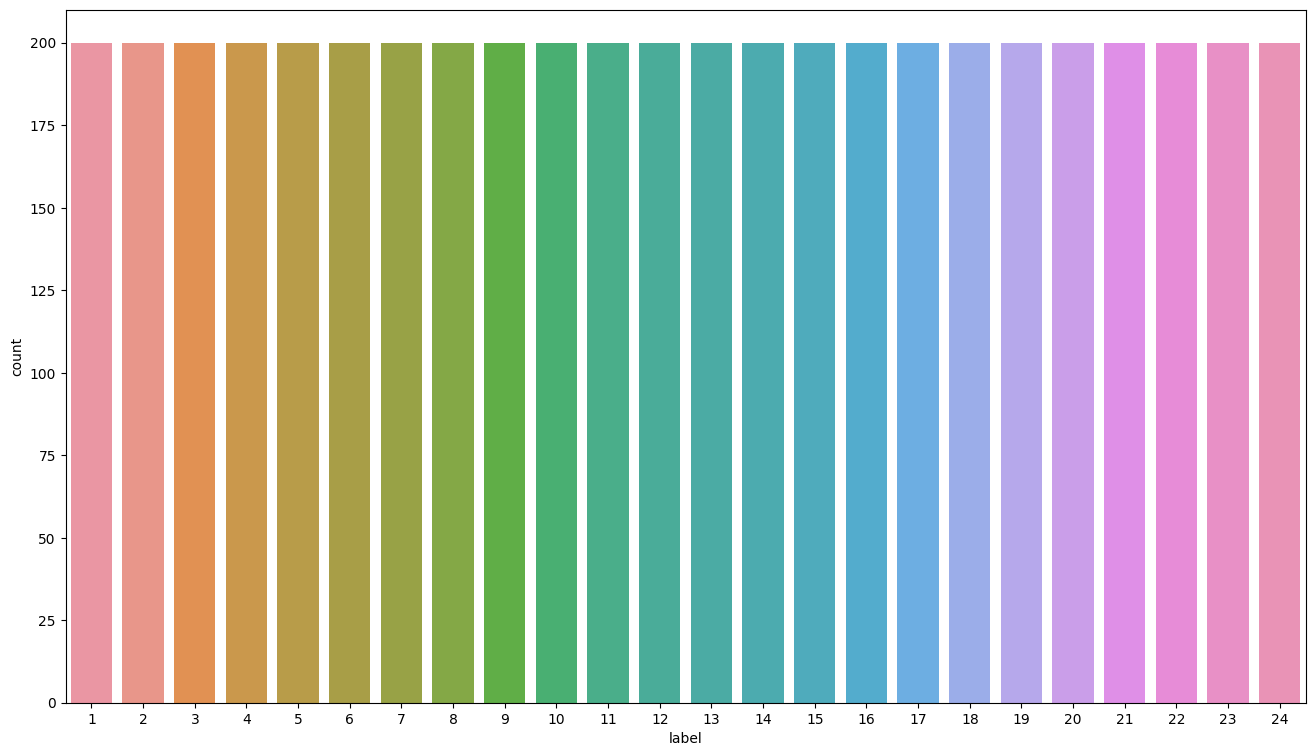

In [15]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [16]:
from imblearn.over_sampling import SMOTE


In [17]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('label', axis=1), df['label'])

# Create a DataFrame with balanced data
balanced_df = pd.DataFrame(X_resampled, columns=df.drop('label', axis=1).columns)
balanced_df['label'] = y_resampled

# Save the balanced data to a new CSV file
balanced_df.to_csv('balanced_data.csv', index=False)

In [18]:
balanced_df.shape

(4800, 9)

<Axes: xlabel='label', ylabel='count'>

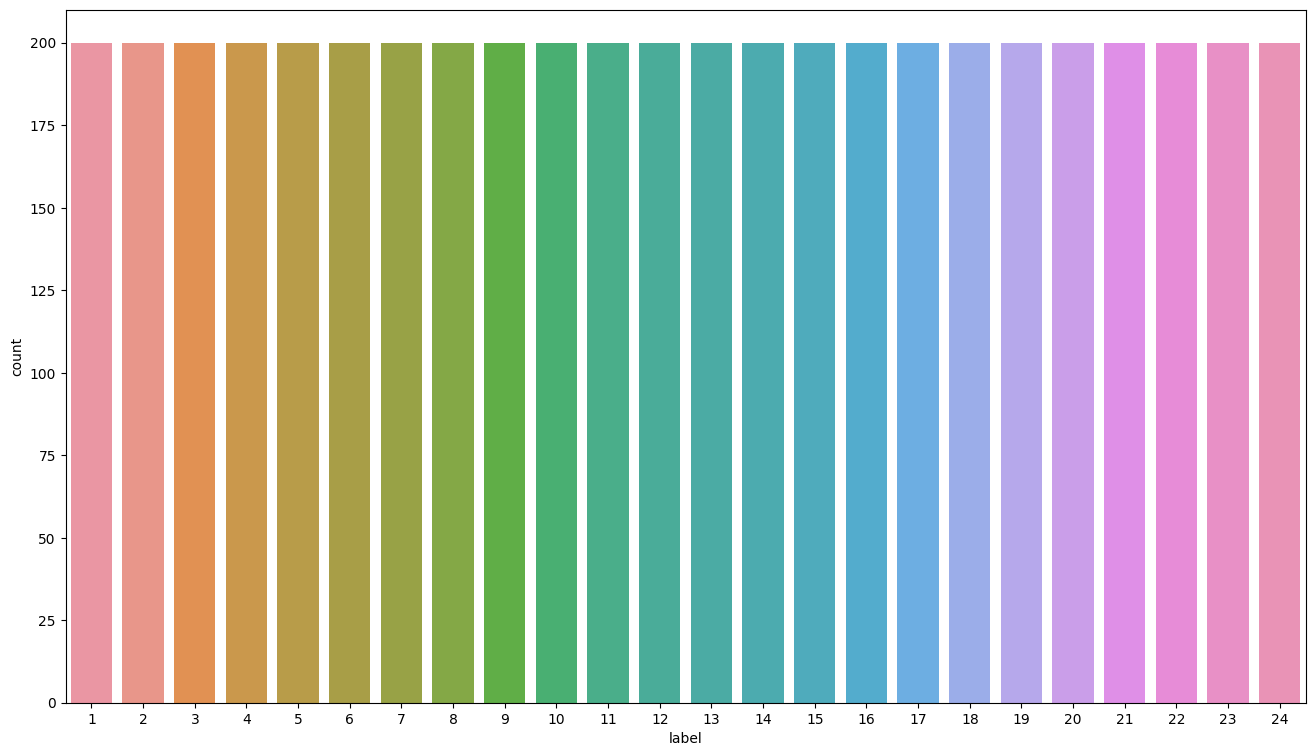

In [19]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=balanced_df,x = 'label')

In [20]:
# Feature scaling
scaler = StandardScaler()
features = balanced_df.drop('label', axis=1)
target = balanced_df['label']

scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [21]:
# Splitting the data into train, validation, and test sets
# Splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [23]:
import joblib


Random Forest Training Accuracy:  0.7601190476190476
Random Forest Accuracy on Validation Set:  0.6958333333333333


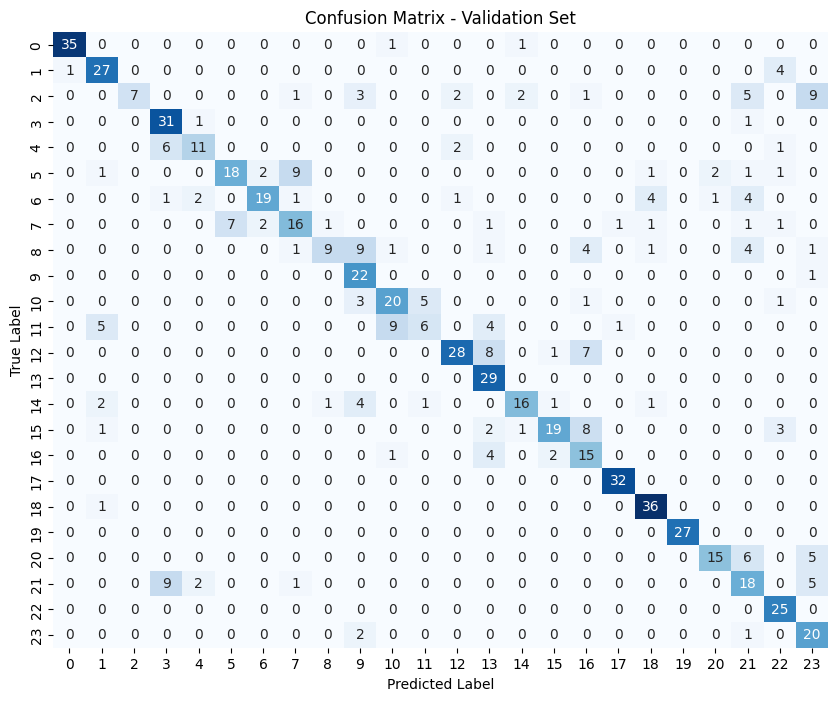

Random Forest Accuracy on Test Set:  0.6763888888888889


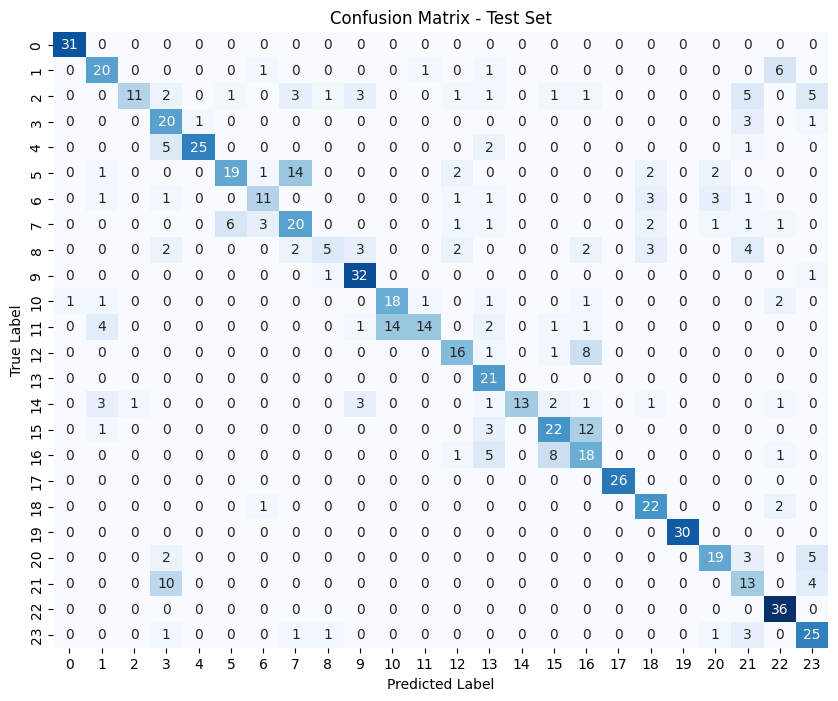

In [24]:
# Training the Random Forest Classifier
RF = RandomForestClassifier(
    criterion='gini',
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=1000,  # Number of trees in the forest
    random_state=0)
RF.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy = RF.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Predicting on the validation set
predicted_values_val = RF.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Confusion Matrix for validation set
cm_val = confusion_matrix(y_val, predicted_values_val)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Predicting on the test set
predicted_values_test = RF.predict(X_test)

# Calculating accuracy on test set
accuracy_test = accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", accuracy_test)

# Confusion Matrix for test set
cm_test = confusion_matrix(y_test, predicted_values_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained model
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(RF, file)

Epoch 1: Training Accuracy: 0.11071428571428571, Validation Accuracy: 0.10555555555555556, Testing Accuracy: 0.10833333333333334
Epoch 2: Training Accuracy: 0.18571428571428572, Validation Accuracy: 0.19166666666666668, Testing Accuracy: 0.17916666666666667
Epoch 3: Training Accuracy: 0.3125, Validation Accuracy: 0.30972222222222223, Testing Accuracy: 0.31805555555555554
Epoch 4: Training Accuracy: 0.3827380952380952, Validation Accuracy: 0.3763888888888889, Testing Accuracy: 0.37916666666666665
Epoch 5: Training Accuracy: 0.45, Validation Accuracy: 0.43333333333333335, Testing Accuracy: 0.43333333333333335
Epoch 6: Training Accuracy: 0.49970238095238095, Validation Accuracy: 0.4722222222222222, Testing Accuracy: 0.5
Epoch 7: Training Accuracy: 0.549702380952381, Validation Accuracy: 0.5263888888888889, Testing Accuracy: 0.5236111111111111
Epoch 8: Training Accuracy: 0.5654761904761905, Validation Accuracy: 0.5527777777777778, Testing Accuracy: 0.5555555555555556
Epoch 9: Training Accu

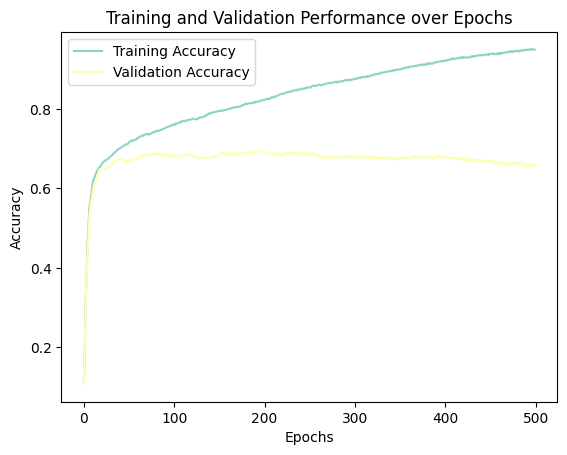

MLP Training Accuracy:  0.9491071428571428
MLP Accuracy on Validation Set:  0.6569444444444444


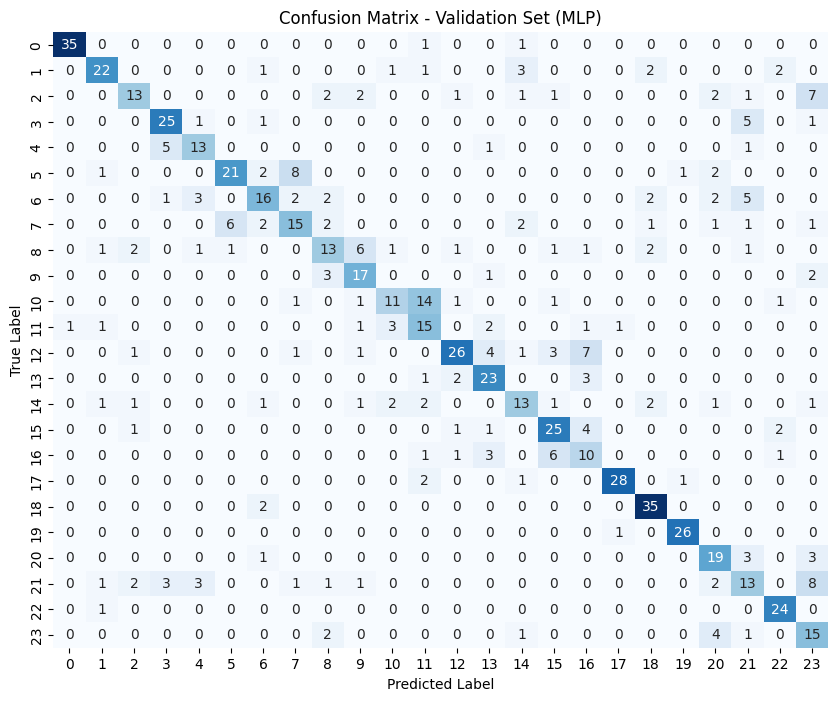

MLP Accuracy on Test Set:  0.6569444444444444


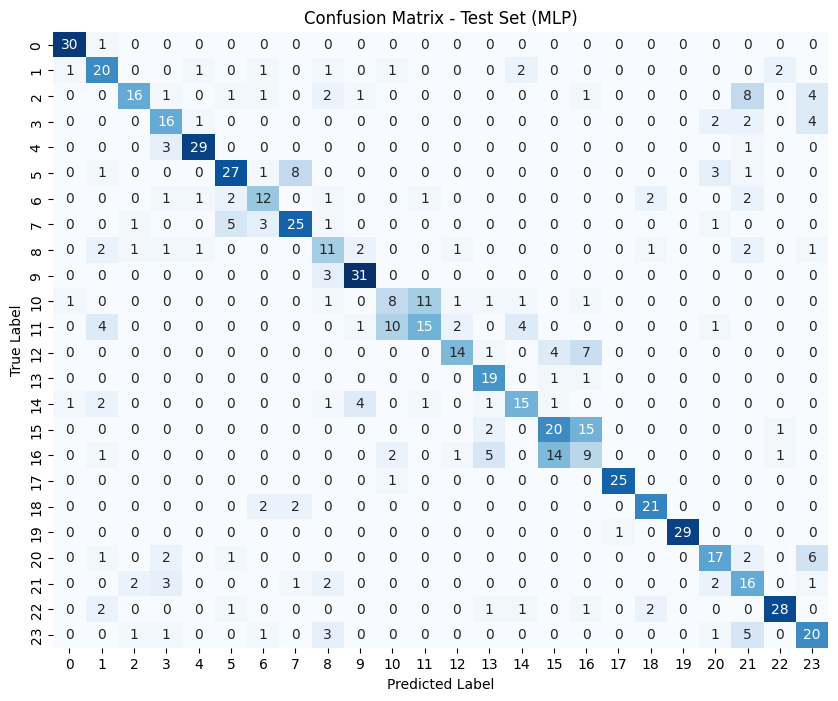

In [28]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Define the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', max_iter=500, random_state=42)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Predicting on the validation set
predicted_values_val_mlp = MLP.predict(X_val)

# Calculating accuracy on validation set
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)

# Confusion Matrix for validation set
cm_val_mlp = confusion_matrix(y_val, predicted_values_val_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and print final testing accuracy
accuracy_test_mlp = testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", accuracy_test_mlp)

# Confusion Matrix for test set
predicted_values_test_mlp = MLP.predict(X_test)
cm_test_mlp = confusion_matrix(y_test, predicted_values_test_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


Epoch 1: Training Accuracy: 0.18928571428571428, Validation Accuracy: 0.19166666666666668, Testing Accuracy: 0.225
Epoch 2: Training Accuracy: 0.3113095238095238, Validation Accuracy: 0.2972222222222222, Testing Accuracy: 0.33611111111111114
Epoch 3: Training Accuracy: 0.47023809523809523, Validation Accuracy: 0.45555555555555555, Testing Accuracy: 0.48333333333333334
Epoch 4: Training Accuracy: 0.5666666666666667, Validation Accuracy: 0.5555555555555556, Testing Accuracy: 0.5569444444444445
Epoch 5: Training Accuracy: 0.5803571428571429, Validation Accuracy: 0.5694444444444444, Testing Accuracy: 0.5763888888888888
Epoch 6: Training Accuracy: 0.5979166666666667, Validation Accuracy: 0.5736111111111111, Testing Accuracy: 0.5847222222222223
Epoch 7: Training Accuracy: 0.6139880952380953, Validation Accuracy: 0.5833333333333334, Testing Accuracy: 0.5861111111111111
Epoch 8: Training Accuracy: 0.625297619047619, Validation Accuracy: 0.5972222222222222, Testing Accuracy: 0.6069444444444444


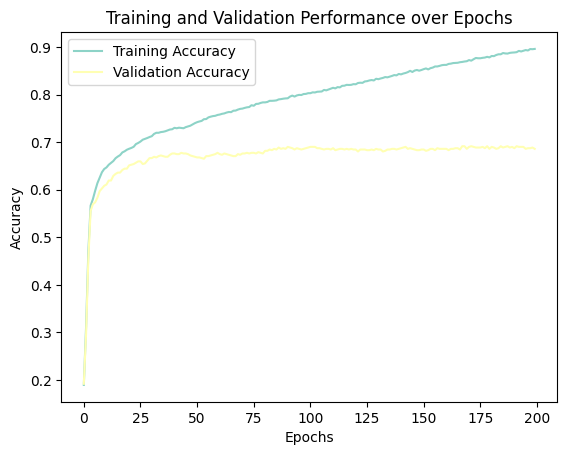

MLP Training Accuracy:  0.8964285714285715
MLP Accuracy on Validation Set:  0.6861111111111111


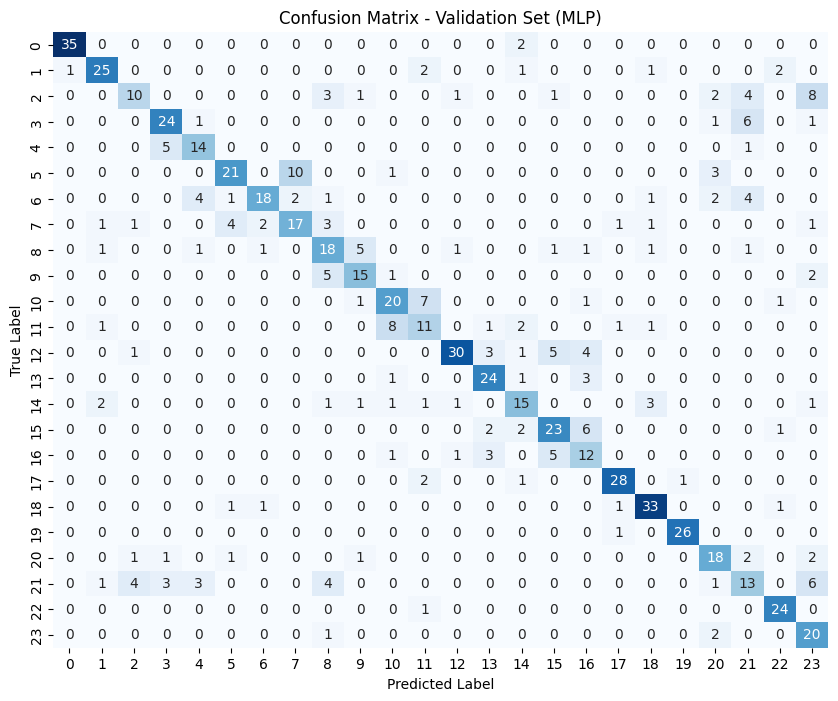

MLP Accuracy on Test Set:  0.675


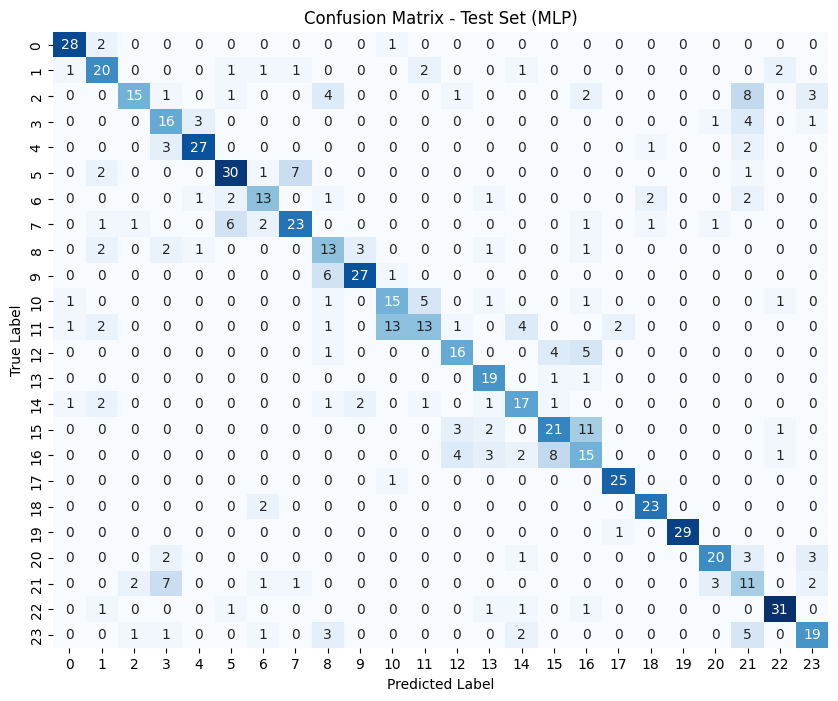

In [54]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Define the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(150, 45, 100), activation='relu', solver='adam', random_state=0)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)

# Confusion Matrix for validation set
predicted_values_val_mlp = MLP.predict(X_val)
cm_val_mlp = confusion_matrix(y_val, predicted_values_val_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and print final testing accuracy
accuracy_test_mlp = testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", accuracy_test_mlp)

# Confusion Matrix for test set
predicted_values_test_mlp = MLP.predict(X_test)
cm_test_mlp = confusion_matrix(y_test, predicted_values_test_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


Epoch 1: Training Accuracy: 0.225, Validation Accuracy: 0.19027777777777777, Testing Accuracy: 0.23055555555555557
Epoch 2: Training Accuracy: 0.3651785714285714, Validation Accuracy: 0.3388888888888889, Testing Accuracy: 0.3236111111111111
Epoch 3: Training Accuracy: 0.47559523809523807, Validation Accuracy: 0.4486111111111111, Testing Accuracy: 0.43472222222222223
Epoch 4: Training Accuracy: 0.5666666666666667, Validation Accuracy: 0.5444444444444444, Testing Accuracy: 0.5458333333333333
Epoch 5: Training Accuracy: 0.5869047619047619, Validation Accuracy: 0.5791666666666667, Testing Accuracy: 0.5611111111111111
Epoch 6: Training Accuracy: 0.6059523809523809, Validation Accuracy: 0.5958333333333333, Testing Accuracy: 0.5875
Epoch 7: Training Accuracy: 0.6190476190476191, Validation Accuracy: 0.5958333333333333, Testing Accuracy: 0.6069444444444444
Epoch 8: Training Accuracy: 0.6306547619047619, Validation Accuracy: 0.6111111111111112, Testing Accuracy: 0.6180555555555556
Epoch 9: Trai

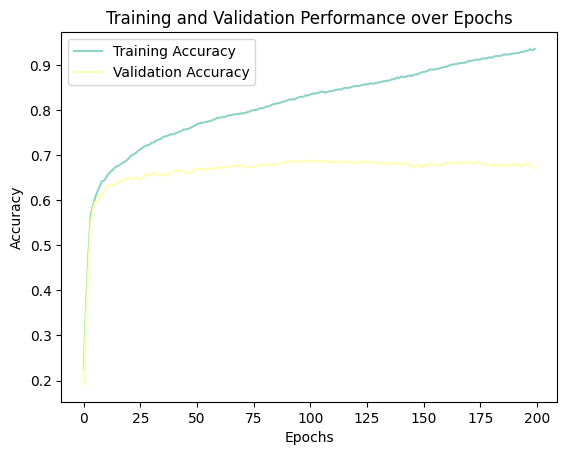

MLP Training Accuracy:  0.9354166666666667
MLP Accuracy on Validation Set:  0.6694444444444444


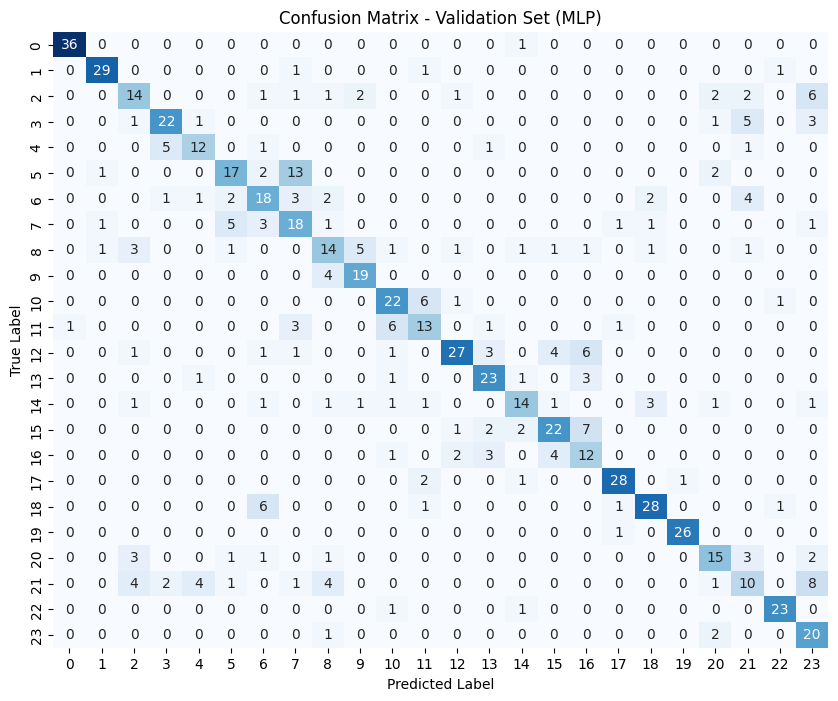

MLP Accuracy on Test Set:  0.6597222222222222


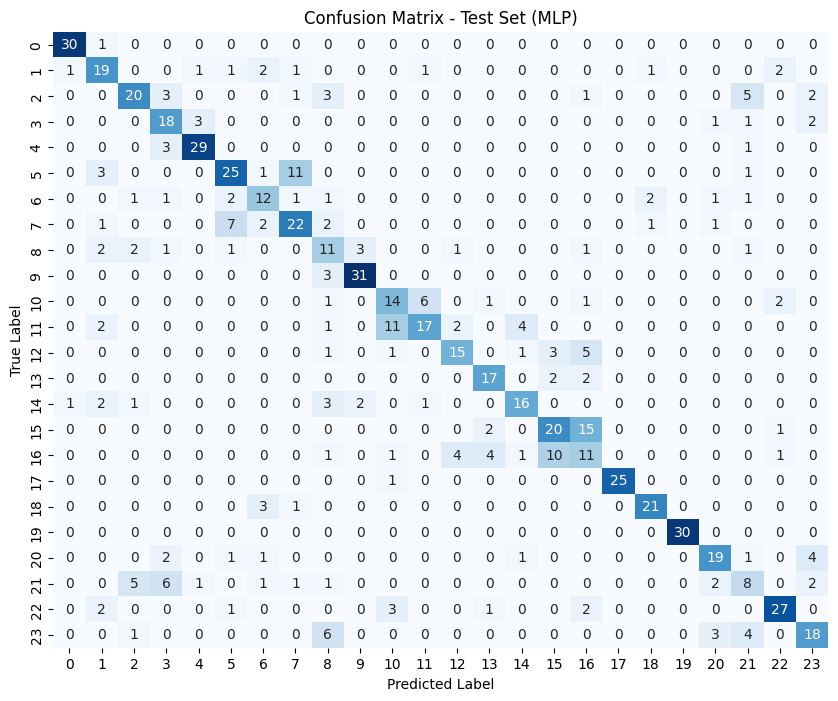

In [44]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib


MLP = MLPClassifier(hidden_layer_sizes=(200,50, 100), activation='relu', solver='adam', alpha=0.0001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                    max_iter=200, early_stopping=False, validation_fraction=0.1,
                    shuffle=True, random_state=42, verbose=False, warm_start=False,
                    momentum=0.9, nesterovs_momentum=True)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)

# Confusion Matrix for validation set
predicted_values_val_mlp = MLP.predict(X_val)
cm_val_mlp = confusion_matrix(y_val, predicted_values_val_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and print final testing accuracy
accuracy_test_mlp = testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", accuracy_test_mlp)

# Confusion Matrix for test set
predicted_values_test_mlp = MLP.predict(X_test)
cm_test_mlp = confusion_matrix(y_test, predicted_values_test_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 7, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

# Create a Random Forest Classifier
RF = RandomForestClassifier(random_state=0)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Train the best Random Forest Classifier
best_rf.fit(X_train, y_train)

# Predicting on the validation set using the best model
predicted_values_val = best_rf.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Predicting on the test set using the best model
predicted_values_test = best_rf.predict(X_test)

# Calculating accuracy on test set
accuracy_test = accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", accuracy_test)

# Confusion Matrix for test set
cm_test = confusion_matrix(y_test, predicted_values_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the best trained Random Forest model
filename = 'best_rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(best_rf, file)

# Get the best parameters where the model achieved the best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_rf)
print("Best Score:", best_score_rf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 7, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1,2,3, 5],
    'min_samples_split': [1,2,3,5]
}

# Create a Random Forest Classifier
RF = RandomForestClassifier(random_state=0)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Train the best Random Forest Classifier
best_rf.fit(X_train, y_train)

# Predicting on the test set using the best model
predicted_values = best_rf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predicted_values)
print("Random Forest Accuracy is: ", accuracy)

# Printing classification report
print(classification_report(y_test, predicted_values))

# Cross-validation score using the best model
score = cross_val_score(best_rf, scaled_df, target, cv=5)
print('Cross-validation score: ', score)

# Printing Train Accuracy
rf_train_accuracy = best_rf.score(X_train, y_train)
print("Training accuracy = ", rf_train_accuracy)

# Printing Test Accuracy
rf_test_accuracy = best_rf.score(X_test, y_test)
print("Testing accuracy = ", rf_test_accuracy)

# Confusion Matrix using the best model
cm_rf = confusion_matrix(y_test, predicted_values)

# Plotting Confusion Matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()


# Get the best parameters where the model achieved the best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_rf)
print("Best Score:", best_score_rf)

import joblib


# Save the best trained Random Forest model
filename = 'best_rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(best_rf, file)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Parameters for Decision Tree Classifier (Expanded range for exploration)
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2,3,4, 5],  # Expanded range
    'min_samples_leaf': [1,2,3, 5],  # Expanded range
    'max_features': ['sqrt', 'log2', None],  # Expanded options
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5],
    'max_depth': [10, 15, 20, 25, 30],  # Expanded range
    'random_state': [2]
}

# Create a Decision Tree Classifier
DT = DecisionTreeClassifier()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=DT, param_grid=dt_params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Train the best Decision Tree Classifier
best_dt.fit(X_train, y_train)

# Predicting on the test set using the best model
predicted_values_dt = best_dt.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, predicted_values_dt)
print("Decision Tree Accuracy is:", accuracy_dt)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predicted_values_dt))

# Cross-validation score using the best model
score_dt = cross_val_score(best_dt, scaled_df, target, cv=5)
print('Cross-validation score:', score_dt)

# Printing Train Accuracy
dt_train_accuracy = best_dt.score(X_train, y_train)
print("Training accuracy =", dt_train_accuracy)

# Printing Test Accuracy
dt_test_accuracy = best_dt.score(X_test, y_test)
print("Testing accuracy =", dt_test_accuracy)

# Confusion Matrix using the best model
cm_dt = confusion_matrix(y_test, predicted_values_dt)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, cmap='viridis', fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Get the best parameters where the model achieved the best score
best_params_dt = grid_search.best_params_
best_score_dt = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_dt)
print("Best Score:", best_score_dt)

# Save the best trained Decision Tree model
filename_dt = 'best_dt_model.pkl'
with open(filename_dt, 'wb') as file_dt:
    joblib.dump(best_dt, file_dt)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parameters for SVM
svm_params = {
    'C': [0.25, 0.50, 0.75, 1.0],
    'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=10)]
}

# Create an SVM Classifier
svm = SVC()

# Perform GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svm_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best estimator for SVM
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Train the best SVM Classifier
best_svm.fit(X_train, y_train)

# Predicting on the test set using the best SVM model
predicted_values_svm = best_svm.predict(X_test)

# Calculating accuracy for SVM
accuracy_svm = accuracy_score(y_test, predicted_values_svm)
print("SVM Accuracy is:", accuracy_svm)

# Printing classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, predicted_values_svm))

# Cross-validation score using the best SVM model
score_svm = cross_val_score(best_svm, X_train, y_train, cv=5)
print('Cross-validation score for SVM:', score_svm)

# Printing Train Accuracy for SVM
svm_train_accuracy = best_svm.score(X_train, y_train)
print("Training accuracy for SVM =", svm_train_accuracy)

# Printing Test Accuracy for SVM
svm_test_accuracy = best_svm.score(X_test, y_test)
print("Testing accuracy for SVM =", svm_test_accuracy)

# Confusion Matrix using the best SVM model
cm_svm = confusion_matrix(y_test, predicted_values_svm)

# Plotting Confusion Matrix for SVM
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, cmap='viridis', fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix for SVM')
plt.show()

# Get the best parameters where the SVM model achieved the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters where the SVM model achieved the best score:")
print(best_params_svm)
print("Best Score for SVM:", best_score_svm)

# Save the best trained SVM model
filename_svm = 'best_svm_model.pkl'
with open(filename_svm, 'wb') as file_svm:
    joblib.dump(best_svm, file_svm)


In [ ]:
import joblib

# Load the trained Random Forest model
rf_model = joblib.load('best_dt_model.pkl')

labels =['Banana', 'Orange', 'Pomegranates', 'Pineapple', 'Lychee','Grapes', 'kiwi', 'Peaches', 'Lemons', 'Limes', 'Plum','Apricots','Dragon Fruit', 'Starfruit', 'Avocado', 'Watermelons', 'Java Plum','Apple', 'Custard Apple', 'Cranberries', 'Guavas', 'Jackfruits','Chayote Fruit', 'Mango']
labels_map = {labels[i]: i + 1 for i in range(len(labels))}


def predict_fruit(ph, temperature, humidity, altitude, rainfall, N, P, K):
    # Prepare input data as a DataFrame
    input_data = pd.DataFrame({
        'ph': [ph],
        'temperature': [temperature],
        'humidity': [humidity],
        'altitude': [altitude],
        'rainfall': [rainfall],
        'N': [N],
        'P': [P],
        'K': [K]
    })

    # Standardize the input data using the same scaler used during training
    scaled_input_data = scaler.transform(input_data)

    # Make predictions using the trained model
    predicted_label = rf_model.predict(scaled_input_data)

    predicted_fruit_name = labels[predicted_label[0] - 1]
    predicted_fruit_label = labels_map[predicted_fruit_name]

    return predicted_fruit_label, predicted_fruit_name

# Example usage
pH_value = 7 # replace with your pH value
temperature_value = 21 # replace with your temperature value
humidity_value = 53.5  # replace with your humidity value
altitude_value = 1220
rainfall_value = 900  # replace with your rainfall value
N_value = 888  # replace with your N value
P_value = 537  # replace with your P value
K_value = 75 # replace with your K value

predicted_fruit_label, predicted_fruit_name = predict_fruit(pH_value, temperature_value, humidity_value, altitude_value, rainfall_value, N_value, P_value, K_value)

print(f"The predicted fruit label is: {predicted_fruit_label}")
print(f"The predicted fruit name is: {predicted_fruit_name}")


In [ ]:
import serial
from time import sleep

sre = serial.Serial("COM4", 9600, timeout=1)

def getSensorData():
    line = sre.readline()
    string = line.decode(errors="replace")
    return string

In [ ]:
print(getSensorData())

In [ ]:
%pip install fastapi uvicorn

In [ ]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
import json
app = FastAPI()

origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],  # Allow all HTTP methods
    allow_headers=["*"],  # Allow all HTTP headers
)

@app.get("/")
def read_root():
    return json.loads(getSensorData())

@app.get("/result")
def get_result():

    dht22Data = json.loads(getSensorData())

    pH_value = 6.5 # replace with your pH value
    temperature_value = dht22Data["tempC"]  # replace with your temperature value
    humidity_value = dht22Data["humi"]  # replace with your humidity value
    altitude_value = 1420
    rainfall_value = 946  # replace with your rainfall value
    N_value = 131  # replace with your N value
    P_value = 41  # replace with your P value
    K_value = 206  # replace with your K value

    predicted_fruit_label, predicted_fruit_name = predict_fruit(pH_value, temperature_value, humidity_value, altitude_value, rainfall_value, N_value, P_value, K_value)

    return ({"label": predicted_fruit_label, "name": predicted_fruit_name })


In [ ]:
import asyncio
import uvicorn

if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    loop = asyncio.get_running_loop()
    loop.create_task(server.serve())